# Station Density Profile of Westcoast Earthquake Early Warning Stations

### Ran at following commit levels
MagD commit https://github.com/pnsn/magD/tree/v1.1

magd_client commit https://github.com/pnsn/magd_client/tree/v1.1

## Create csv of all EEW sites

Must have the following headers:
* net
* sta
* chan
* location
* lat
* lon
* rate*

*sample rate(not required)


## Clean CSV

ShakeAlert Coordinator provided two xls files, one current west coast eew, on notional west coast eew. Since this is densisty problem, location, and chan are disregarded. Both files were edited in Excel, where the headers were renamed and the following columns were added to prevent errrors:
* chan
* location
* rate
These files were then saved as CSV to 
* ./csv/west_coast/current-3-27-2019.csv 
* ./csv/west_coast/notional-3-27-2019.csv

In [ ]:
%run scripts/clean_csv.py -i csv/eew_density/eew_stas_current_all.csv -o csv/eew_density/eew_stas_current_clean.csv

In [8]:
from magD.magD import MagD
from magD.pickle import get_pickle
import os

magd_client_path = '/Users/joncon/Sites/magd_client/'
pickle_path = magd_client_path + "/pickle_jar"
os.chdir(magd_client_path)
print('Working in ' + os.getcwd())

lat_min=29.0
lat_max=54.0
lon_min=-131.0
lon_max=-112.0

resolution=1
#number of stations to use in solution. 
num_solutions=4

# wave velocities
velocity_p = 5.4
velocity_s = 3



data_srcs ={'west_coast_current':
                {
                    'csv_path':'csv/west_coast/existing-3-27-2019.csv',
                    'color': 'yellow',
                    'symbol': '^',
                    'size': 50,
                    'label': "Current",
                    'unit': 'Km',
                    'klass': 'scnl'
                },
            'west_coast_notional':
                {
                    'csv_path':'csv/west_coast/notional-3-27-2019.csv',
                    'color': 'red',
                    'symbol': '^',
                    'size': 50,
                    'label': "Notional",
                    'unit': 'seconds',
                    'klass': 'scnl'
                },
                
            }

'''if needed, overide default marker attrs and save to avoid rerunning plot
magD_object.markers['west_coast_existing']['color']='yellow'
magD_object.markers['west_coast_existing']['symbol']='o'
magD_object.markers['west_coast_existing']['size']=10
magD_object.save()'''

def make_grid(grid_type, src, lat_min=lat_min, lat_max=lat_max, lon_min=lon_min, lon_max=lon_max):
    grid = MagD(grid_type, name, resolution, lat_min, lat_max, lon_min, lon_max, 
                   num_solutions, pickle_path)
    grid.build_markers(src)
    grid.build_origins()
    grid.build_matrix()
    grid.save()
    return grid


Working in /Users/joncon/Sites/magd_client


In [3]:
#only run once
import os
os.chdir(magd_client_path)
print('Working in ' + magd_client_path)
from magD.pickle import *
#set book to autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

Working in /Users/joncon/Sites/magd_client/


## Create and save MapGrids

In [9]:
#name of config file in ./config/{name}.ini
name ="west_coast_current"

grid_type = 'dist_max'

src = {}
src['west_coast_current'] = data_srcs['west_coast_current']
%time wc_current = make_grid(grid_type, src)
print(wc_current.get_path())

Profiling spatially...
lat: 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, CPU times: user 35.4 s, sys: 57.7 ms, total: 35.4 s
Wall time: 35.4 s
/Users/joncon/Sites/magd_client//pickle_jar/west_coast_current/dist_max_grid/25x19-res-1.pickle


In [18]:
#name of config file in ./config/{name}.ini
name ="west_coast_current_and_notional"

grid_type = 'dist_max'

src = {}
src['west_coast_current'] = data_srcs['west_coast_current']
src['west_coast_notional'] = data_srcs['west_coast_notional']
%time wc_current_and_notional = make_grid(grid_type, src)
print(wc_current_and_notional.get_path())


Profiling spatially...
lat: 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, CPU times: user 2min 28s, sys: 371 ms, total: 2min 28s
Wall time: 2min 28s
/Users/joncon/Sites/magd_client//pickle_jar/west_coast_current_and_notional/dist_max_grid/25x19-res-1.pickle


In [14]:
# diff of notional and existing
#pass into args
#type: the catoregory with will also be the folder of pickle file
#name: name of pickle file
diff_wc = wc_current_and_notional.copy("diff_west_coast", "diff_wc_density")
diff_wc.matrix = wc_current.matrix - wc_current_and_notional.matrix
diff_wc.save()
diff_wc_path= diff_wc.get_path()

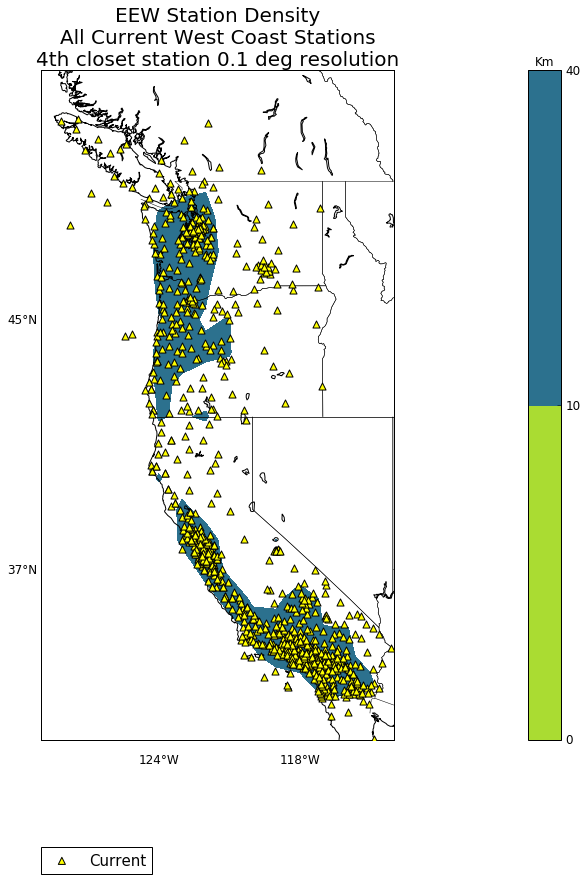

In [16]:
path = wc_current.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0,10,40

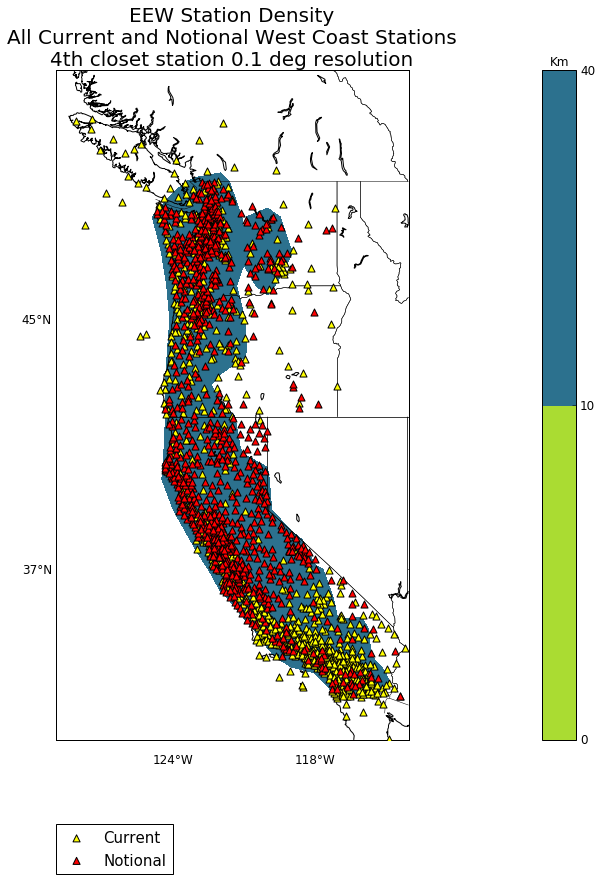

In [19]:
path = wc_current_and_notional.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0,10,40

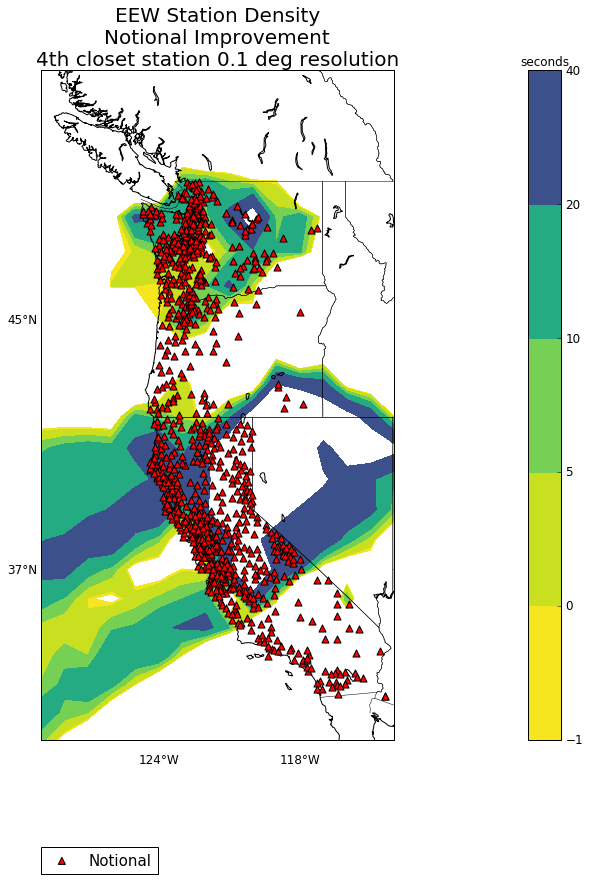

In [21]:
path = diff_wc.get_path()
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Station Density" \
--title2="Notional Improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=-1,0,5,10,20,40

## Blind zone

In [41]:
#create blindzone(no alert) grid for depth
#######8km#################
#existing
grid_wc_existing_bz8 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz8")
grid_wc_existing_bz8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_wc_existing_bz8.save()
grid_wc_existing_bz8_path = grid_wc_existing_bz8.get_path()

#complete 
grid_wc_complete_bz8 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz8")
grid_wc_complete_bz8.transform_to_blindzone(velocity_p, velocity_s, 8)
grid_wc_complete_bz8.save()
grid_wc_complete_bz8_path = grid_wc_complete_bz8.get_path()

#diff
grid_wc_diff_bz8 = grid_wc_complete_bz8.copy("diff_west_coast", "diff_wc_bz8")
grid_wc_diff_bz8.matrix = grid_wc_existing_bz8.matrix - grid_wc_complete_bz8.matrix
grid_wc_diff_bz8.save()
grid_wc_diff_bz8_path= grid_wc_diff_bz8.get_path()

#######20km###########

grid_wc_existing_bz20 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz20")
grid_wc_existing_bz20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_wc_existing_bz20.save()
grid_wc_existing_bz20_path = grid_wc_existing_bz20.get_path()

#complete 
grid_wc_complete_bz20 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz20")
grid_wc_complete_bz20.transform_to_blindzone(velocity_p, velocity_s, 20)
grid_wc_complete_bz20.save()
grid_wc_complete_bz20_path = grid_wc_complete_bz20.get_path()

#diff
grid_wc_diff_bz20 = grid_wc_complete_bz20.copy("diff_west_coast", "diff_wc_bz20")
grid_wc_diff_bz20.matrix = grid_wc_existing_bz20.matrix - grid_wc_complete_bz20.matrix
grid_wc_diff_bz20.save()
grid_wc_diff_bz20_path= grid_wc_diff_bz20.get_path()

######50km#########  

grid_wc_existing_bz50 = grid_wc_existing.copy("diff_west_coast", "wc_existing_bz50")
grid_wc_existing_bz50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_wc_existing_bz50.save()
grid_wc_existing_bz50_path = grid_wc_existing_bz50.get_path()

#complete 
grid_wc_complete_bz50 = grid_wc_complete.copy("diff_west_coast", "wc_complete_bz50")
grid_wc_complete_bz50.transform_to_blindzone(velocity_p, velocity_s, 50)
grid_wc_complete_bz50.save()
grid_wc_complete_bz50_path = grid_wc_complete_bz50.get_path()

#diff
grid_wc_diff_bz50 = grid_wc_complete_bz50.copy("diff_west_coast", "diff_wc_bz50")
grid_wc_diff_bz50.matrix = grid_wc_existing_bz50.matrix - grid_wc_complete_bz50.matrix
grid_wc_diff_bz50.save()
grid_wc_diff_bz50_path= grid_wc_diff_bz50.get_path()

### 8km deep

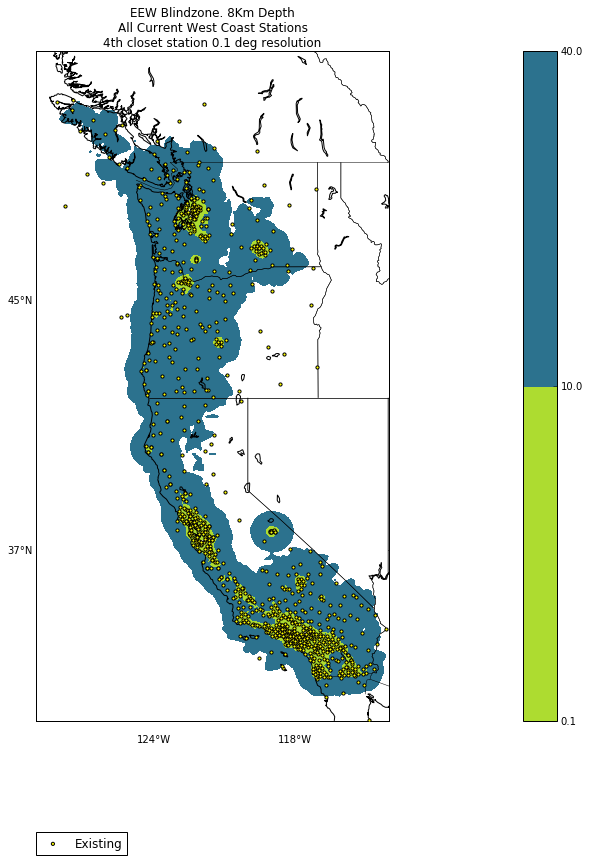

In [37]:
path=grid_wc_existing_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

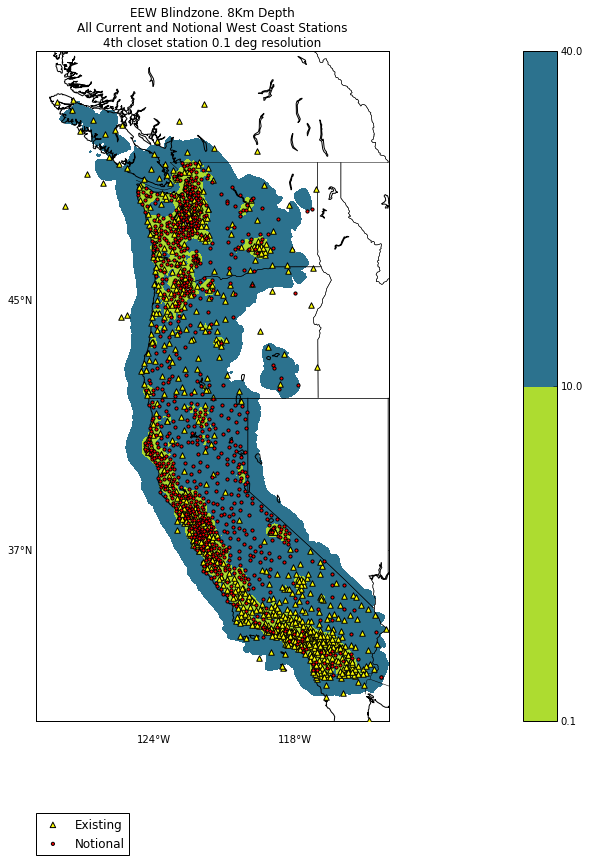

In [38]:
path=grid_wc_complete_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

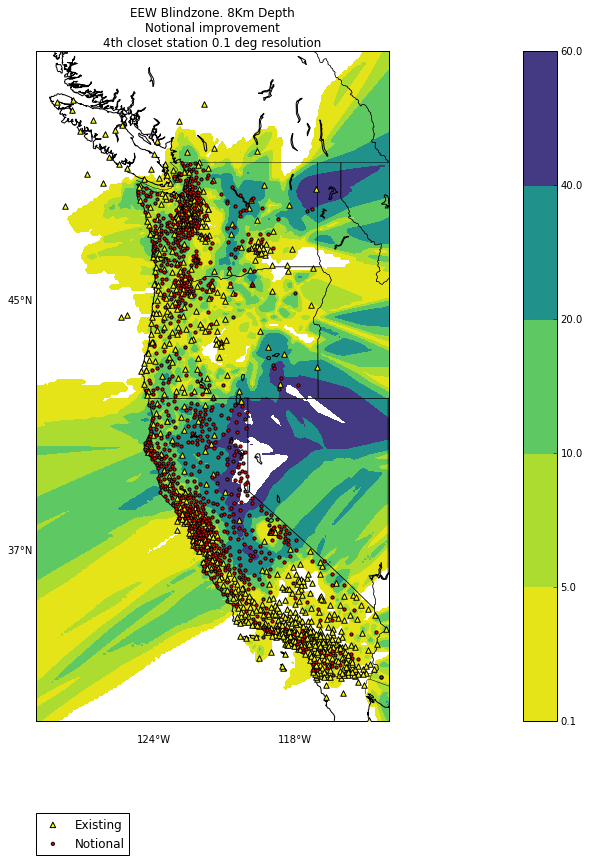

In [39]:
path=grid_wc_diff_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 8Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60

### 20km

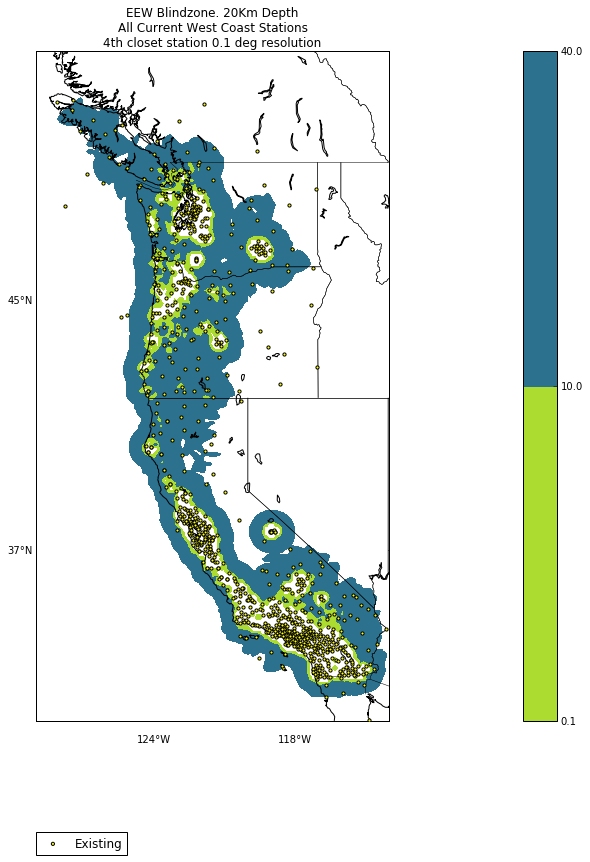

In [42]:
path=grid_wc_existing_bz20_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

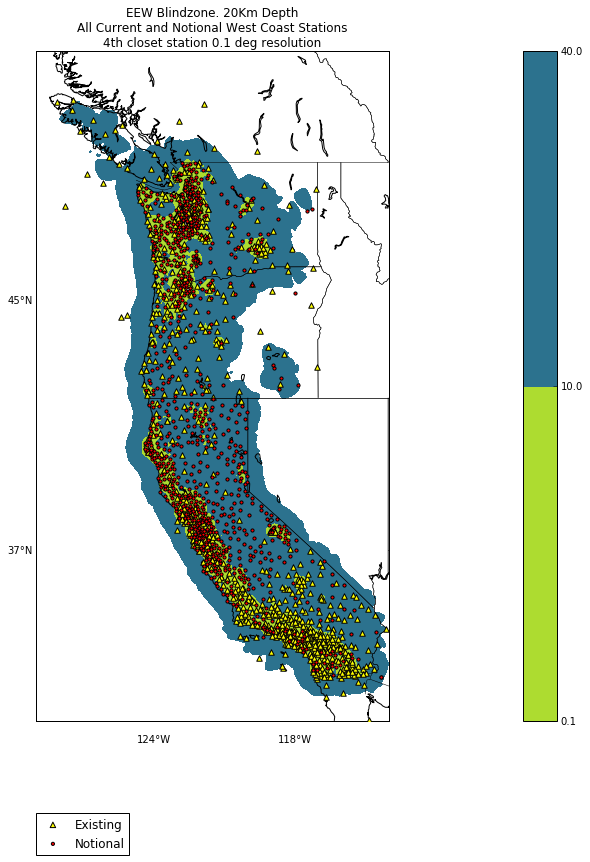

In [43]:
path=grid_wc_complete_bz8_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

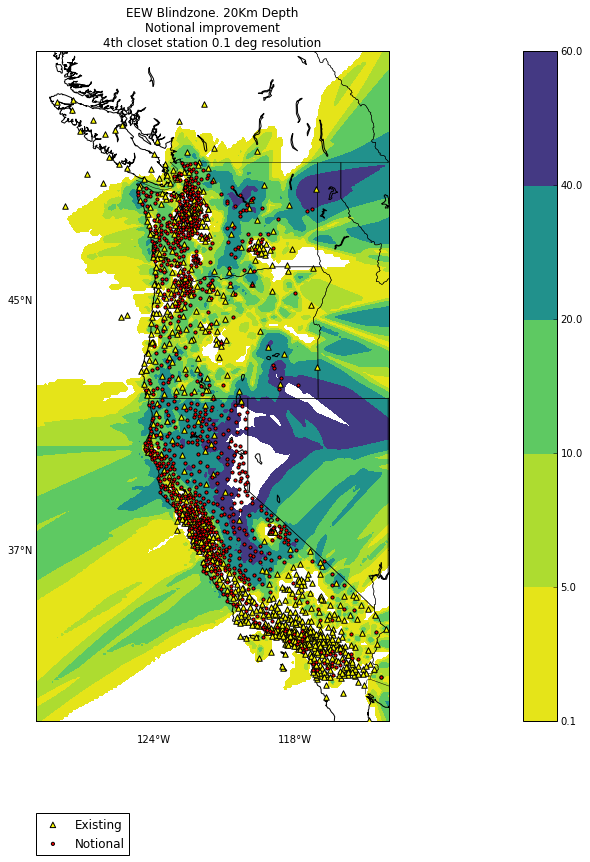

In [44]:
path=grid_wc_diff_bz20_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 20Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60

### 50km

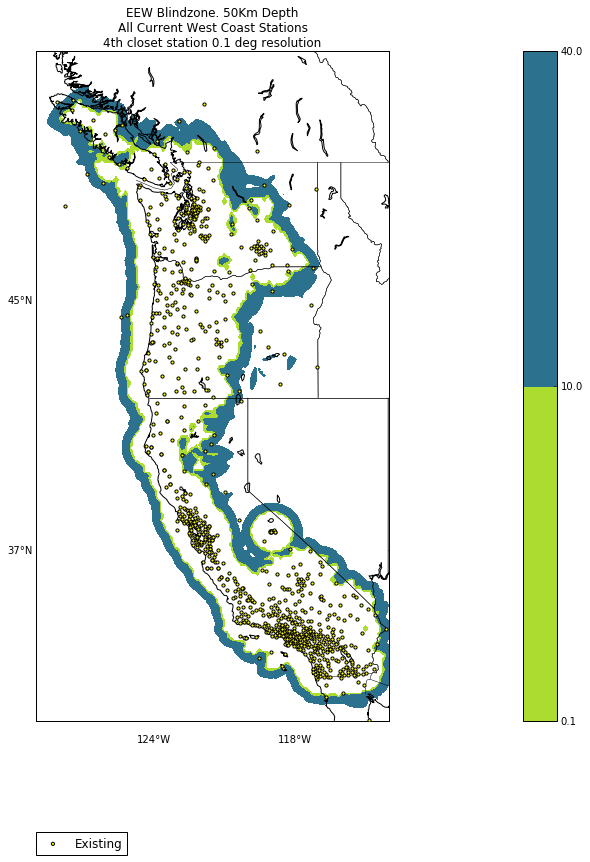

In [45]:
path=grid_wc_existing_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="All Current West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

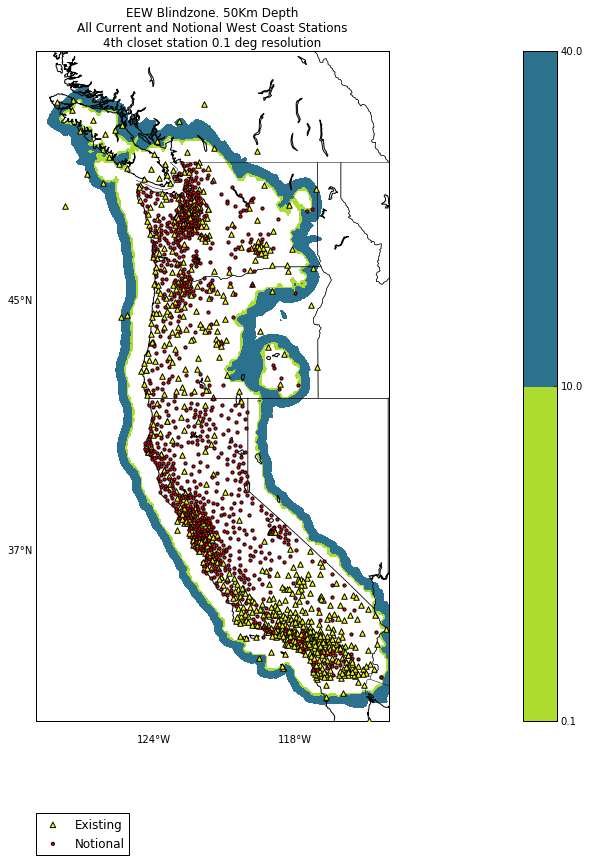

In [46]:
path=grid_wc_complete_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="All Current and Notional West Coast Stations" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,10,40

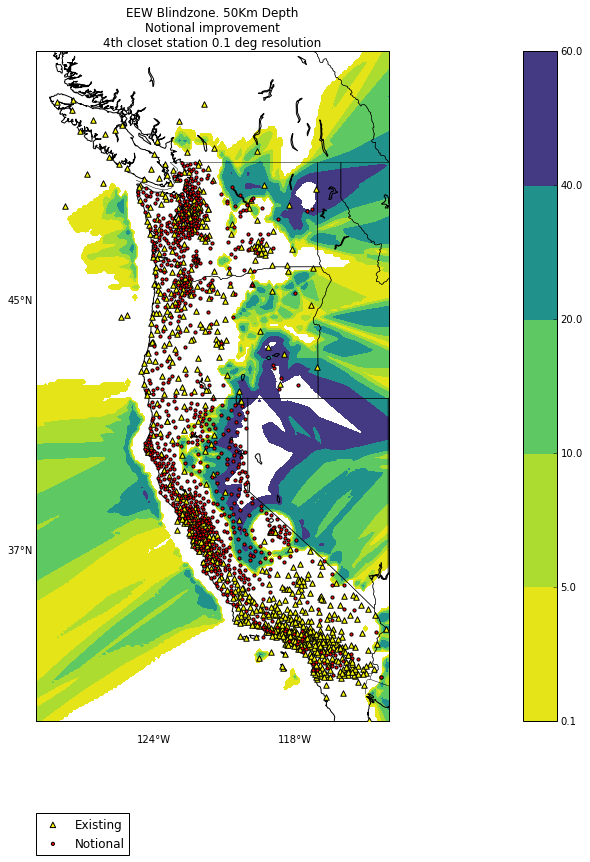

In [47]:
path=grid_wc_diff_bz50_path
%run -i scripts/plot_heatmap.py \
--path=$path \
--title1="EEW Blindzone. 50Km Depth" \
--title2="Notional improvement" \
--title3="4th closet station 0.1 deg resolution" \
--plotwidth=60 \
--plotstas=True \
--color=viridis_r \
--levels=0.1,5,10,20,40,60